In [137]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [138]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [139]:
df.shape


(103, 7)

# CLEANING DATA


Removing irregular commas 

In [140]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",","")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


Removing null values

In [141]:
df.isna().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [142]:
df[df["Acreage (Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [143]:
df = df.dropna().reset_index()

In [144]:
df.head()

,index,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,0,Brazil,South America,768678382,3668531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


Removing unneccesary columns

In [145]:
df.drop(["index", "Unnamed: 0"], axis = 1, inplace = True)

In [146]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [147]:
df.dtypes

Country                       object
Continent                     object
Production (Tons)             object
Production per Person (Kg)    object
Acreage (Hectare)             object
Yield (Kg / Hectare)          object
dtype: object

changing data type of numerical columns

In [148]:
df["Production (Tons)"] = df["Production (Tons)"].astype(float)
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].astype(float)
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].astype(float)
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].astype(float)

In [149]:
df.dtypes

Country                        object
Continent                      object
Production (Tons)             float64
Production per Person (Kg)    float64
Acreage (Hectare)             float64
Yield (Kg / Hectare)          float64
dtype: object

Checking unique values

In [150]:
df.nunique()

Country                       102
Continent                       6
Production (Tons)             102
Production per Person (Kg)    101
Acreage (Hectare)             101
Yield (Kg / Hectare)          102
dtype: int64

# Univariate Analysis


In [151]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,75167.5
1,India,Asia,348448000.0,260721.0,4950000.0,70393.5
2,China,Asia,123059739.0,88287.0,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


How many countries produce sugarcane from each country?

In [152]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

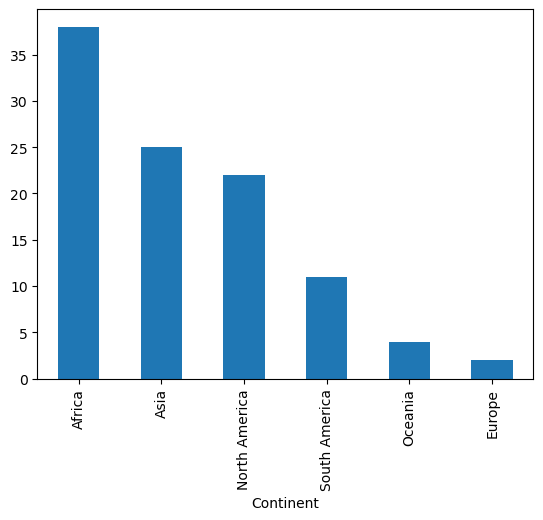

In [153]:
df["Continent"].value_counts().plot(kind = "bar")

Distribution of columns

C:\Users\Vedant\AppData\Local\Temp\ipykernel_18452\517163927.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production (Tons)"])
C:\Users\Vedant\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vedant\AppData\Local\Temp\ipykernel_18452\517163927.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar

<Axes: xlabel='Yield (Kg / Hectare)', ylabel='Density'>

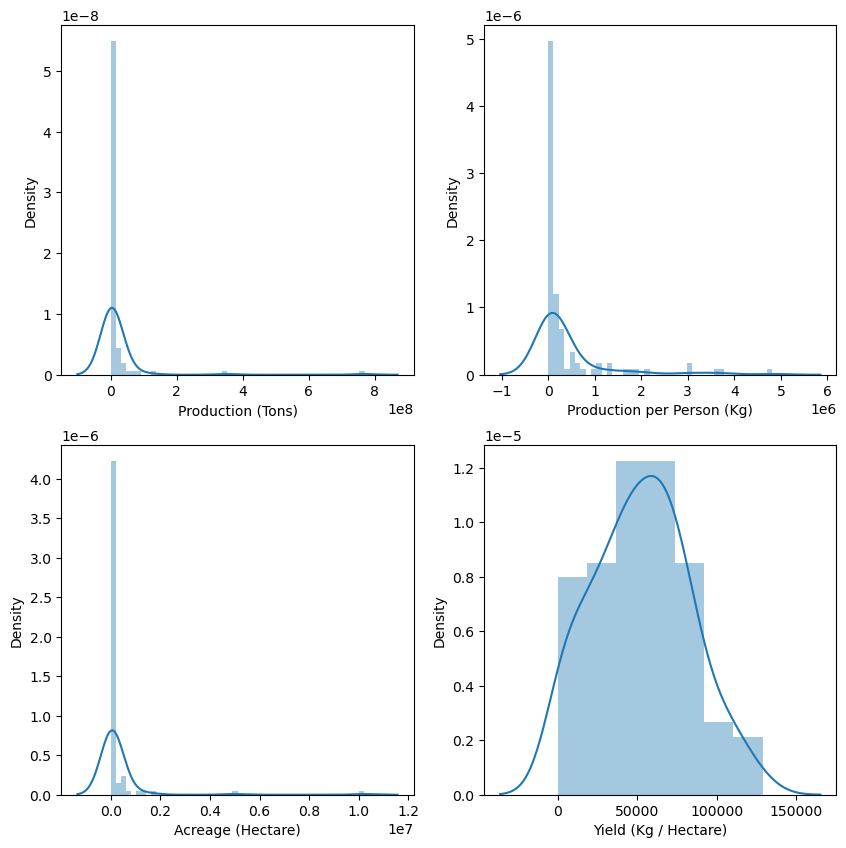

In [154]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production (Tons)"])
plt.subplot(2,2,2)
sns.distplot(df["Production per Person (Kg)"])
plt.subplot(2,2,3)
sns.distplot(df["Acreage (Hectare)"])
plt.subplot(2,2,4)
sns.distplot(df["Yield (Kg / Hectare)"])

Checking Outliers

<Axes: >

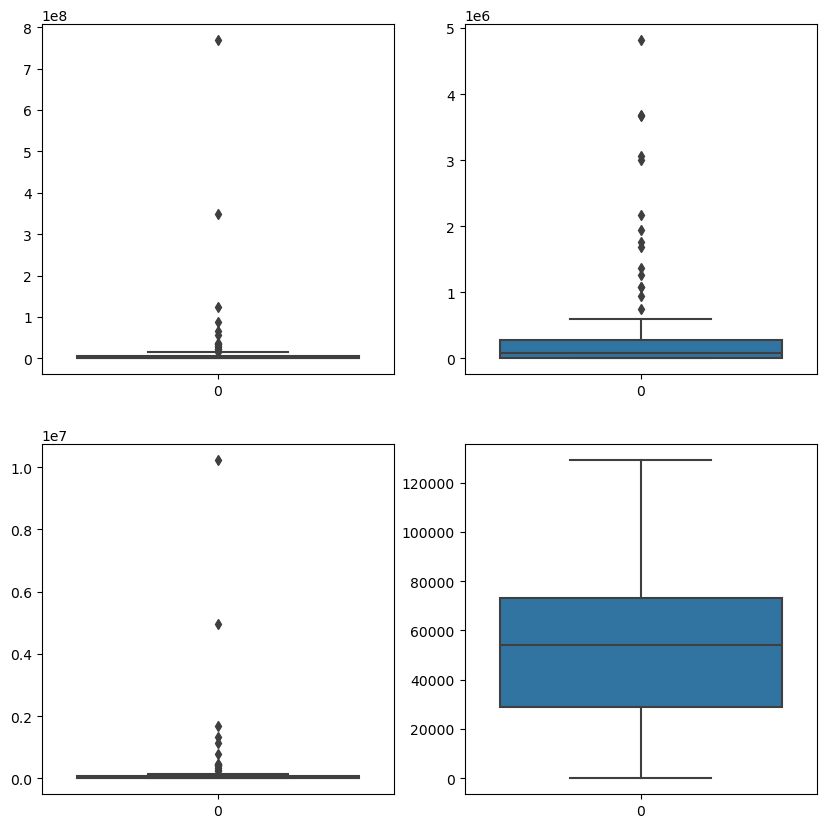

In [155]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.boxplot(df["Production (Tons)"])
plt.subplot(2,2,2)
sns.boxplot(df["Production per Person (Kg)"])
plt.subplot(2,2,3)
sns.boxplot(df["Acreage (Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(df["Yield (Kg / Hectare)"])

In [156]:
df.describe()

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
count,1.020000e+02,1.020000e+02,1.020000e+02,102.000000
mean,1.850372e+07,4.124805e+05,2.498981e+05,52628.078431
std,8.419149e+07,8.669140e+05,1.137003e+06,30504.676683
min,1.000000e+00,0.000000e+00,0.000000e+00,10.000000
25%,6.251875e+04,1.075225e+04,1.104000e+03,29072.025000
50%,1.440044e+06,8.135850e+04,1.655800e+04,54108.950000
75%,6.426824e+06,2.828128e+05,8.047400e+04,73282.700000
max,7.686784e+08,4.816299e+06,1.022620e+07,129049.300000


# Bivariate Analysis

In [157]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,75167.5
1,India,Asia,348448000.0,260721.0,4950000.0,70393.5
2,China,Asia,123059739.0,88287.0,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


Which country produces maximum sugarcane

In [158]:
df_new = df[["Country","Production (Tons)"]].set_index("Country")
df_new

,Production (Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [159]:
df_new["Production (Tons) Percent"] = df_new["Production (Tons)"]*100/df_new["Production (Tons)"].sum()
df_new

,Production (Tons),Production (Tons) Percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production (Tons) Percent'>

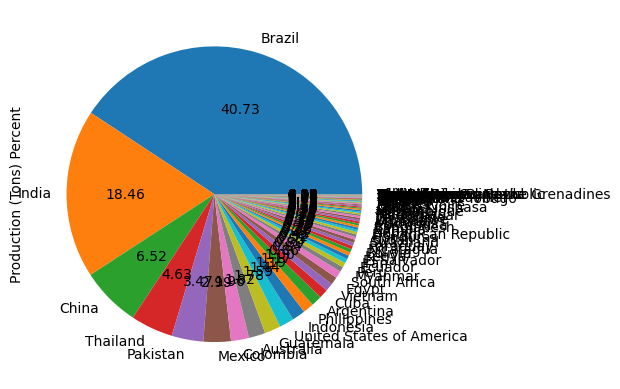

In [160]:
df_new["Production (Tons) Percent"].plot(kind = "pie", autopct = "%.2f")

[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Colombia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Guatemala'),
 Text(9, 0, 'United States of America')]

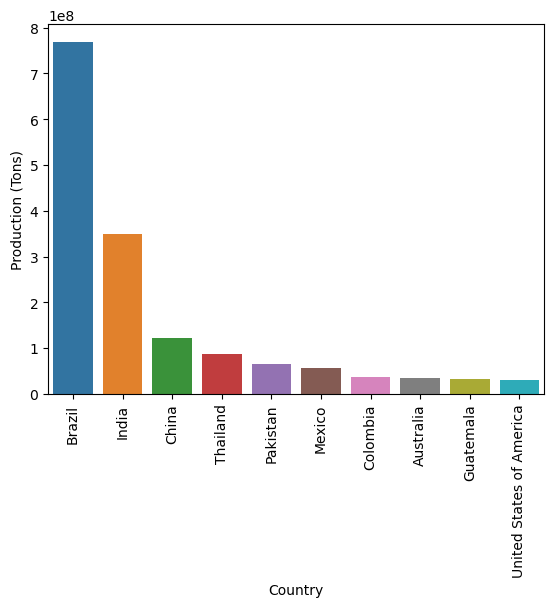

In [161]:
df_pdr = df.sort_values("Production (Tons)", ascending = False)
ax = sns.barplot(data = df_pdr.head(10), x = "Country", y = "Production (Tons)")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

Which country has highest land

[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Indonesia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Cuba'),
 Text(9, 0, 'Colombia')]

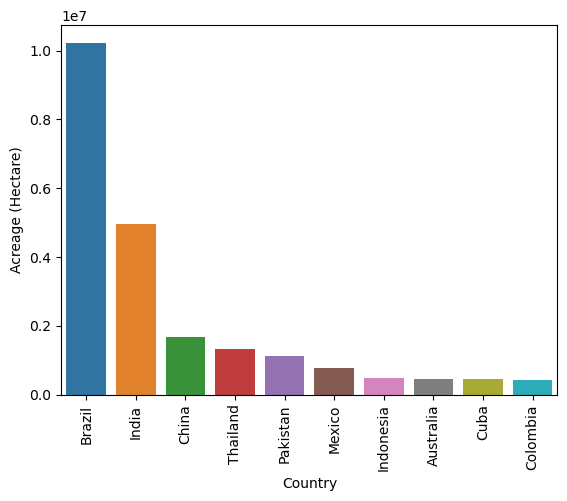

In [162]:
df_cdr = df.sort_values("Acreage (Hectare)", ascending = False)
ax2 = sns.barplot(data = df_cdr.head(10), x = "Country", y = "Acreage (Hectare)")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)

Which country has highest Yield (Kg / Hectare)

[Text(0, 0, 'Guatemala'),
 Text(1, 0, 'Senegal'),
 Text(2, 0, 'Egypt'),
 Text(3, 0, 'Peru'),
 Text(4, 0, 'Malawi'),
 Text(5, 0, 'Chad'),
 Text(6, 0, 'Zambia'),
 Text(7, 0, 'Burkina Faso'),
 Text(8, 0, 'Swaziland'),
 Text(9, 0, 'Nicaragua')]

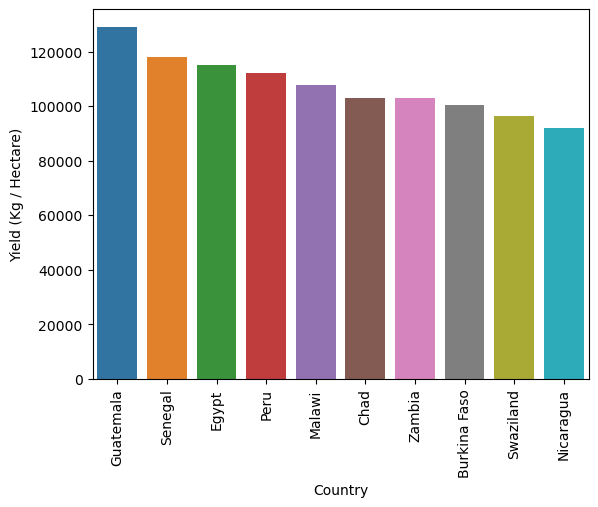

In [163]:
df_y = df.sort_values("Yield (Kg / Hectare)", ascending = False)
ax3 = sns.barplot(data = df_y.head(10), x = "Country", y = "Yield (Kg / Hectare)")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation = 90)

Which country has highest production per person

[Text(0, 0, 'Swaziland'),
 Text(1, 0, 'Belize'),
 Text(2, 0, 'Brazil'),
 Text(3, 0, 'Guyana'),
 Text(4, 0, 'Mauritius'),
 Text(5, 0, 'Saint Kitts and Nevis'),
 Text(6, 0, 'Guatemala'),
 Text(7, 0, 'Fiji'),
 Text(8, 0, 'Cuba'),
 Text(9, 0, 'Australia')]

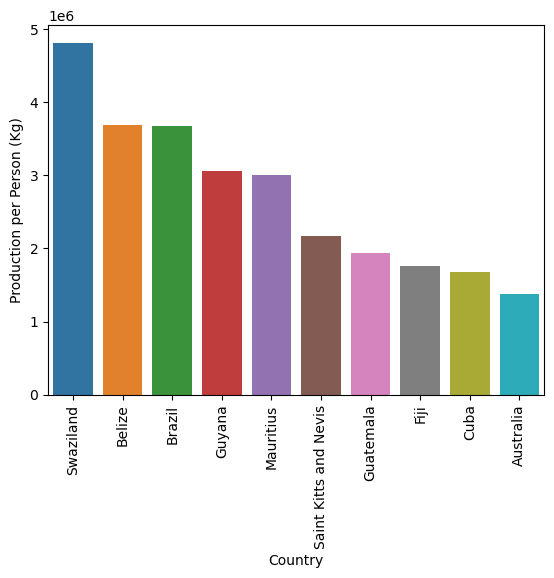

In [164]:
df_k = df.sort_values("Production per Person (Kg)", ascending = False)
ax4 = sns.barplot(data = df_k.head(10), x = "Country", y = "Production per Person (Kg)")
ax4.set_xticklabels(ax4.get_xticklabels(), rotation = 90)

Correlation


In [165]:
df.head(10)

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,75167.5
1,India,Asia,348448000.0,260721.0,4950000.0,70393.5
2,China,Asia,123059739.0,88287.0,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0
5,Mexico,North America,56446821.0,452524.0,781054.0,7227.0
6,Colombia,South America,36951213.0,740075.0,416626.0,88691.5
7,Australia,Oceania,34403004.0,1373406.0,447204.0,76929.1
8,Guatemala,North America,33533403.0,1938114.0,25985.0,129049.3
9,United States of America,North America,29926210.0,91304.0,37053.0,80766.0


In [166]:
columns = ["Production (Tons)", "Production per Person (Kg)", "Acreage (Hectare)", "Yield (Kg / Hectare)"]
df[columns].corr()

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Production (Tons),1.000000,0.352369,0.997550,0.132812
Production per Person (Kg),0.352369,1.000000,0.341974,0.220522
Acreage (Hectare),0.997550,0.341974,1.000000,0.113433
Yield (Kg / Hectare),0.132812,0.220522,0.113433,1.000000


<Axes: >

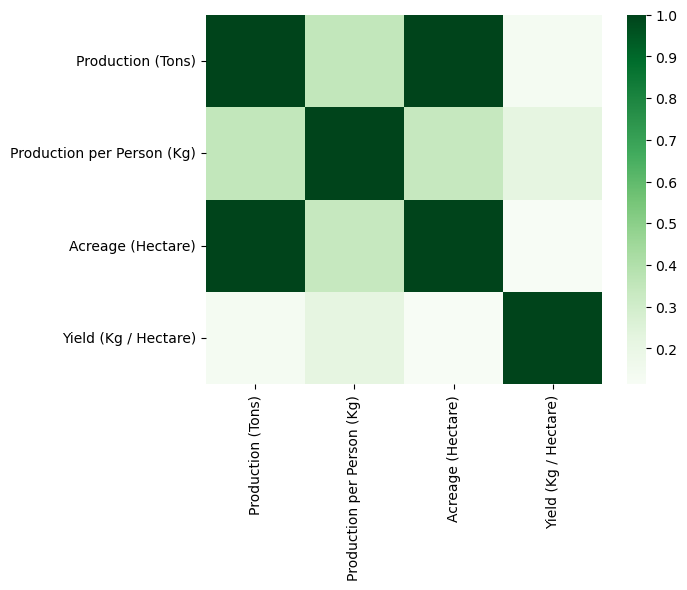

In [167]:
sns.heatmap(df[columns].corr(), cmap = "Greens")


Do countries with highest land produce more sugarcane?

<Axes: xlabel='Acreage (Hectare)', ylabel='Production (Tons)'>

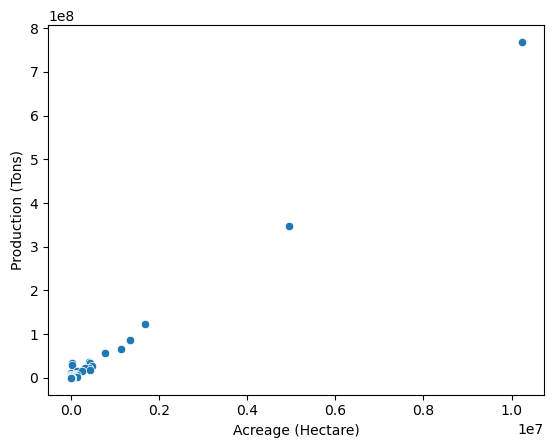

In [168]:
sns.scatterplot(data = df, x = "Acreage (Hectare)", y = "Production (Tons)")

# Continent Analysis

Which continent produces highest sugarcane

In [169]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,75167.5
1,India,Asia,348448000.0,260721.0,4950000.0,70393.5
2,China,Asia,123059739.0,88287.0,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


In [171]:
df_Continent = df.groupby("Continent").sum()
df_Continent.drop("Country", axis = 1)

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Continent,,,,
Africa,89681472.0,10144110.0,1439089.0,2142107.5
Asia,721930425.0,3120808.0,10608319.0,1171871.4
Europe,5823.0,536.0,71.0,131870.9
North America,173995947.0,15420953.0,1581983.0,1082602.4
Oceania,36177574.0,3158066.0,490909.0,162419.1
South America,865588126.0,10228540.0,11369236.0,677192.7


<Axes: xlabel='Continent'>

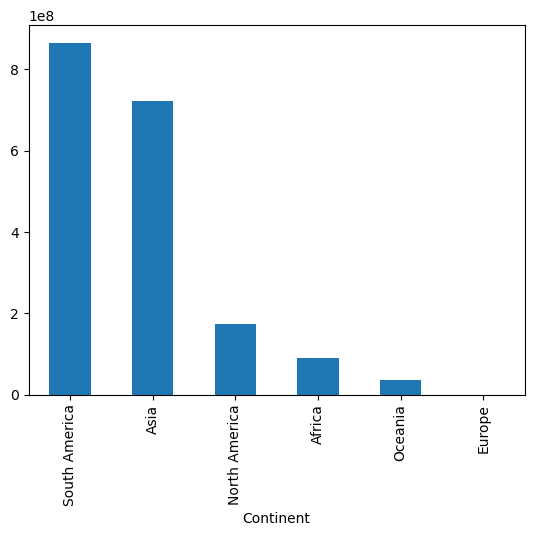

In [172]:
df_Continent["Production (Tons)"].sort_values(ascending = False).plot(kind = "bar")

Which Contitnent highest land

<Axes: xlabel='Continent'>

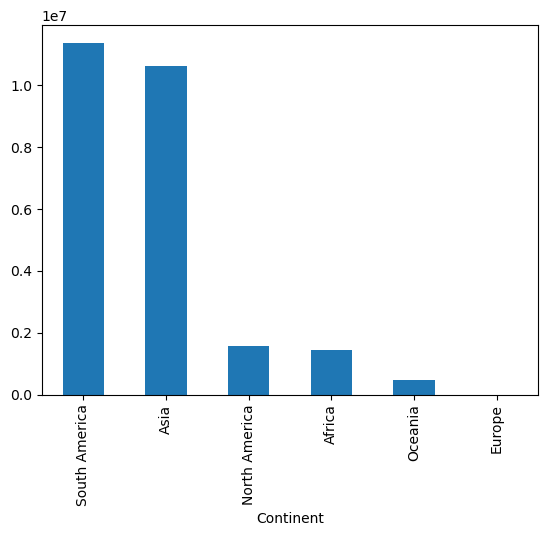

In [173]:
df_Continent["Acreage (Hectare)"].sort_values(ascending = False).plot(kind = "bar")

Do continents with higher land produces more sugarcane

In [178]:
columns2 = ["Production (Tons)", "Acreage (Hectare)"]
df_Continent[columns2].corr()

,Production (Tons),Acreage (Hectare)
Production (Tons),1.000000,0.994897
Acreage (Hectare),0.994897,1.000000


Production distribution 

<Axes: ylabel='Production (Tons)'>

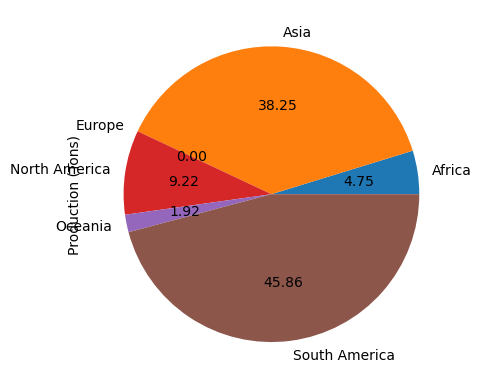

In [176]:
df_Continent["Production (Tons)"].plot(kind = "pie", autopct = "%.2f")